In [1]:
import pandas as pd
flights = pd.read_csv('../../../large_files/flights_w_weather_full.csv')
#flights = flights.sample(10**6)

In [2]:
col_f = ['fl_date','op_unique_carrier', 'dep_delay', 'air_time','distance','origin_city_name','dest_city_name']
flights = flights[col_f]
flights

,fl_date,op_unique_carrier,dep_delay,air_time,distance,origin_city_name,dest_city_name
0,2018-01-01,B6,250.0,189.0,1698.0,"Austin, TX","Boston, MA"
1,2018-01-01,B6,262.0,247.0,1698.0,"Boston, MA","Austin, TX"
2,2018-01-01,B6,-1.0,114.0,718.0,"New York, NY","Savannah, GA"
3,2018-01-01,B6,3.0,99.0,718.0,"Savannah, GA","New York, NY"
4,2018-01-01,B6,1.0,173.0,1023.0,"Newark, NJ","West Palm Beach/Palm Beach, FL"
...,...,...,...,...,...,...,...
15927480,2019-12-31,B6,0.0,120.0,718.0,"New York, NY","Savannah, GA"
15927481,2019-12-31,B6,-1.0,82.0,718.0,"Savannah, GA","New York, NY"
15927482,2019-12-31,B6,-23.0,47.0,265.0,"Boston, MA","Syracuse, NY"
15927483,2019-12-31,B6,64.0,126.0,989.0,"Orlando, FL","Newburgh/Poughkeepsie, NY"


In [3]:
flights = flights[flights.air_time>0]

In [4]:
flights['month'] = pd.to_datetime(flights['fl_date'],format='%Y-%m-%d').apply(lambda x: x.month)
flights['year'] = pd.to_datetime(flights['fl_date'],format='%Y-%m-%d').apply(lambda x: x.year)
flights.drop(columns=['fl_date'],inplace=True)
flights

,op_unique_carrier,dep_delay,air_time,distance,origin_city_name,dest_city_name,month,year
0,B6,250.0,189.0,1698.0,"Austin, TX","Boston, MA",1,2018
1,B6,262.0,247.0,1698.0,"Boston, MA","Austin, TX",1,2018
2,B6,-1.0,114.0,718.0,"New York, NY","Savannah, GA",1,2018
3,B6,3.0,99.0,718.0,"Savannah, GA","New York, NY",1,2018
4,B6,1.0,173.0,1023.0,"Newark, NJ","West Palm Beach/Palm Beach, FL",1,2018
...,...,...,...,...,...,...,...,...
15927480,B6,0.0,120.0,718.0,"New York, NY","Savannah, GA",12,2019
15927481,B6,-1.0,82.0,718.0,"Savannah, GA","New York, NY",12,2019
15927482,B6,-23.0,47.0,265.0,"Boston, MA","Syracuse, NY",12,2019
15927483,B6,64.0,126.0,989.0,"Orlando, FL","Newburgh/Poughkeepsie, NY",12,2019


In [5]:
flights['distance'] *= 1.60934
flights['air_time'] /= 60
flights['speed'] = flights.distance/flights.air_time
flights

,op_unique_carrier,dep_delay,air_time,distance,origin_city_name,dest_city_name,month,year,speed
0,B6,250.0,3.150000,2732.65932,"Austin, TX","Boston, MA",1,2018,867.510895
1,B6,262.0,4.116667,2732.65932,"Boston, MA","Austin, TX",1,2018,663.803883
2,B6,-1.0,1.900000,1155.50612,"New York, NY","Savannah, GA",1,2018,608.161116
3,B6,3.0,1.650000,1155.50612,"Savannah, GA","New York, NY",1,2018,700.306739
4,B6,1.0,2.883333,1646.35482,"Newark, NJ","West Palm Beach/Palm Beach, FL",1,2018,570.990111
...,...,...,...,...,...,...,...,...,...
15927480,B6,0.0,2.000000,1155.50612,"New York, NY","Savannah, GA",12,2019,577.753060
15927481,B6,-1.0,1.366667,1155.50612,"Savannah, GA","New York, NY",12,2019,845.492283
15927482,B6,-23.0,0.783333,426.47510,"Boston, MA","Syracuse, NY",12,2019,544.436298
15927483,B6,64.0,2.100000,1591.63726,"Orlando, FL","Newburgh/Poughkeepsie, NY",12,2019,757.922505


In [6]:
flights.sort_values(by='speed')

,op_unique_carrier,dep_delay,air_time,distance,origin_city_name,dest_city_name,month,year,speed
15612725,ZW,18.0,11.683333,196.33948,"Chicago, IL","Kalamazoo, MI",12,2019,16.805091
4205782,AS,-2.0,1.400000,49.88954,"Wrangell, AK","Petersburg, AK",7,2018,35.635386
13183172,AS,-1.0,1.216667,49.88954,"Wrangell, AK","Petersburg, AK",8,2019,41.005101
15551828,AS,-18.0,1.166667,49.88954,"Wrangell, AK","Petersburg, AK",12,2019,42.762463
9656930,EV,-9.0,25.950000,1319.65880,"Jacksonville, FL","Newark, NJ",3,2019,50.853904
...,...,...,...,...,...,...,...,...,...
82554,QX,0.0,0.150000,207.60486,"Portland, OR","Seattle, WA",1,2018,1384.032400
4875040,CP,77.0,0.766667,1120.10064,"San Jose, CA","Seattle, WA",8,2018,1461.000835
4468266,QX,1.0,0.416667,642.12666,"Seattle, WA","Boise, ID",7,2018,1541.103984
12963219,OO,115.0,0.266667,720.98432,"Atlanta, GA","Monroe, LA",8,2019,2703.691200


In [7]:
from scipy import stats

z = stats.zscore(flights.speed)
flights = flights.loc[(abs(z)<3)]
flights.sort_values(by='speed')

,op_unique_carrier,dep_delay,air_time,distance,origin_city_name,dest_city_name,month,year,speed
12095517,9E,60.0,1.650000,466.70860,"Norfolk, VA","New York, NY",7,2019,282.853697
1886797,WN,117.0,1.416667,400.72566,"Cincinnati, OH","Chicago, IL",4,2018,282.865172
4911587,WN,-6.0,1.416667,400.72566,"Cincinnati, OH","Chicago, IL",8,2018,282.865172
5161288,OO,-1.0,2.133333,603.50250,"Bloomington/Normal, IL","Minneapolis, MN",8,2018,282.891797
1371221,CP,20.0,1.916667,542.34758,"Los Angeles, CA","San Francisco, CA",3,2018,282.963955
...,...,...,...,...,...,...,...,...,...
8631160,AA,-10.0,6.083333,6089.74256,"Honolulu, HI","Dallas/Fort Worth, TX",2,2019,1001.053572
8992057,AA,-8.0,6.083333,6089.74256,"Honolulu, HI","Dallas/Fort Worth, TX",2,2019,1001.053572
8992002,AA,-8.0,6.083333,6089.74256,"Honolulu, HI","Dallas/Fort Worth, TX",2,2019,1001.053572
1420226,AA,-7.0,6.083333,6089.74256,"Honolulu, HI","Dallas/Fort Worth, TX",3,2018,1001.053572


In [8]:
passengers = pd.read_csv('../../../large_files/passengers.csv')
#passengers = passengers.sample(10**6)

In [9]:
col_p = ['departures_performed','passengers', 'distance', 'air_time', 'unique_carrier','month', 'year', 'origin_city_name','dest_city_name' ]
passengers = passengers[col_p]
passengers

,departures_performed,passengers,distance,air_time,unique_carrier,month,year,origin_city_name,dest_city_name
0,30.0,8241.0,4263.0,0.0,LH,6,2019,"Washington, DC","Munich, Germany"
1,30.0,14512.0,5233.0,0.0,LH,6,2019,"Houston, TX","Frankfurt, Germany"
2,4.0,0.0,5233.0,0.0,LH,6,2019,"Houston, TX","Frankfurt, Germany"
3,1.0,0.0,270.0,0.0,LH,6,2019,"Jacksonville, FL","Atlanta, GA"
4,1.0,354.0,3856.0,0.0,LH,6,2019,"New York, NY","Frankfurt, Germany"
...,...,...,...,...,...,...,...,...,...
2350492,591.0,2181.0,11.0,6052.0,1SQ,6,2016,"Tinian, TT","Saipan, TT"
2350493,634.0,2300.0,11.0,6348.0,1SQ,3,2016,"Tinian, TT","Saipan, TT"
2350494,639.0,2318.0,11.0,7186.0,1SQ,7,2016,"Saipan, TT","Tinian, TT"
2350495,21.0,0.0,601.0,0.0,KLQ,9,2017,"Reno, NV","Phoenix, AZ"


In [10]:
passengers = passengers[passengers.air_time>0]
passengers = passengers[passengers.passengers>0]
passengers = passengers[passengers.distance>0]
passengers = passengers[passengers.year>=2018]

In [11]:
passengers['distance'] *= 1.60934 
passengers['air_time'] /= 60/passengers.departures_performed
passengers['speed'] = passengers.distance/passengers.air_time
passengers

,departures_performed,passengers,distance,air_time,unique_carrier,month,year,origin_city_name,dest_city_name,speed
55,1.0,1.0,168.98070,0.600000,04Q,5,2019,"Nantucket, MA","Bedford, MA",281.634500
56,15.0,79.0,307.38394,195.000000,04Q,5,2019,"Nantucket, MA","White Plains, NY",1.576328
57,1.0,3.0,370.14820,1.100000,04Q,5,2019,"Nantucket, MA","Morristown, NJ",336.498364
58,1.0,1.0,48.28020,0.200000,04Q,5,2019,"Nantucket, MA","Martha's Vineyard, MA",241.401000
59,1.0,2.0,259.10374,0.900000,04Q,5,2019,"Nantucket, MA","Waterbury, CT",287.893044
...,...,...,...,...,...,...,...,...,...,...
2350449,596.0,3200.0,146.44994,216685.733333,9K,6,2019,"Nantucket, MA","Boston, MA",0.000676
2350451,608.0,3827.0,146.44994,225497.066667,9K,8,2018,"Nantucket, MA","Boston, MA",0.000649
2350452,617.0,3660.0,146.44994,232218.233333,9K,9,2019,"Nantucket, MA","Boston, MA",0.000631
2350453,617.0,3704.0,146.44994,232218.233333,9K,7,2019,"Nantucket, MA","Boston, MA",0.000631


In [12]:
passengers.sort_values(by='speed')

,departures_performed,passengers,distance,air_time,unique_carrier,month,year,origin_city_name,dest_city_name,speed
2350432,1053.0,3671.0,17.70274,220164.750000,1SQ,8,2019,"Saipan, TT","Tinian, TT",0.000080
465348,1053.0,3671.0,17.70274,220164.750000,1SQ,8,2019,"Saipan, TT","Tinian, TT",0.000080
2350425,993.0,3324.0,17.70274,192989.550000,1SQ,5,2019,"Saipan, TT","Tinian, TT",0.000092
465344,993.0,3324.0,17.70274,192989.550000,1SQ,5,2019,"Saipan, TT","Tinian, TT",0.000092
465345,1013.0,3358.0,17.70274,187371.233333,1SQ,12,2019,"Saipan, TT","Tinian, TT",0.000094
...,...,...,...,...,...,...,...,...,...,...
120089,1.0,96.0,1673.71360,1.250000,SY,7,2019,"Bullhead City, AZ","Austin, TX",1338.970880
601852,1.0,128.0,2642.53628,1.966667,SY,10,2018,"Bullhead City, AZ","Fort Wayne, IN",1343.662515
70342,1.0,48.0,683.96950,0.483333,AMQ,9,2019,"Hancock/Houghton, MI","Detroit, MI",1415.109310
119977,1.0,103.0,1673.71360,1.150000,SY,7,2019,"Austin, TX","Bullhead City, AZ",1455.403130


In [13]:
z = stats.zscore(passengers.speed)
passengers = passengers.loc[(abs(z)<3)]
passengers.sort_values(by='speed')

,departures_performed,passengers,distance,air_time,unique_carrier,month,year,origin_city_name,dest_city_name,speed
465348,1053.0,3671.0,17.70274,220164.750000,1SQ,8,2019,"Saipan, TT","Tinian, TT",0.000080
2350432,1053.0,3671.0,17.70274,220164.750000,1SQ,8,2019,"Saipan, TT","Tinian, TT",0.000080
2350425,993.0,3324.0,17.70274,192989.550000,1SQ,5,2019,"Saipan, TT","Tinian, TT",0.000092
465344,993.0,3324.0,17.70274,192989.550000,1SQ,5,2019,"Saipan, TT","Tinian, TT",0.000092
465345,1013.0,3358.0,17.70274,187371.233333,1SQ,12,2019,"Saipan, TT","Tinian, TT",0.000094
...,...,...,...,...,...,...,...,...,...,...
160213,1.0,68.0,777.31122,1.066667,G7,8,2019,"Denver, CO","Sioux Falls, SD",728.729269
609967,1.0,141.0,777.31122,1.066667,09Q,1,2018,"Wendover, UT","Cheyenne, WY",728.729269
661612,1.0,120.0,777.31122,1.066667,F9,5,2018,"Denver, CO","Sioux Falls, SD",728.729269
645550,1.0,117.0,2198.35844,3.016667,DL,9,2018,"Guatemala City, Guatemala","Atlanta, GA",728.737604


In [62]:
passengers[passengers['unique_carrier']=='AA']

,departures_performed,passengers,distance,air_time,unique_carrier,month,year,origin_city_name,dest_city_name,speed
410741,57.0,8497.0,48526.42902,74.816667,AA,9,2019,"Charlotte, NC","Newark, NJ",648.604531
195626,2.0,417.0,4725.02224,5.983333,AA,9,2019,"Cancun, Mexico","Philadelphia, PA",789.697310
417329,60.0,8767.0,109402.93320,152.050000,AA,6,2019,"Aruba, Aruba","Miami, FL",719.519455
406419,54.0,7377.0,70044.91416,98.800000,AA,2,2019,"Nashville, TN","Miami, FL",708.956621
1852342,31.0,3328.0,121630.69852,155.216667,AA,10,2019,"Dallas/Fort Worth, TX","Bogota, Colombia",783.618803
...,...,...,...,...,...,...,...,...,...,...
139942,1.0,122.0,1161.94348,1.650000,AA,3,2019,"San Jose del Cabo, Mexico","Phoenix, AZ",704.208170
399271,50.0,5475.0,129712.80400,177.233333,AA,8,2019,"Charlotte, NC","Philipsburg, Sint Maarten",731.875892
423374,60.0,9668.0,150827.34480,192.850000,AA,9,2019,"Dallas/Fort Worth, TX","Boston, MA",782.096680
457736,132.0,20014.0,392151.09648,543.216667,AA,6,2019,"Chicago, IL","San Francisco, CA",721.905495


In [14]:
carrier_delay = flights.groupby(['op_unique_carrier','origin_city_name','dest_city_name','month','year'])['dep_delay'].mean()
carrier_delay = carrier_delay.reset_index(level=['op_unique_carrier','origin_city_name','dest_city_name','month','year'])
carrier_delay

,op_unique_carrier,origin_city_name,dest_city_name,month,year,dep_delay
0,9E,"Akron, OH","Atlanta, GA",1,2019,2.233333
1,9E,"Akron, OH","Atlanta, GA",2,2019,8.857143
2,9E,"Akron, OH","Atlanta, GA",3,2019,-1.561404
3,9E,"Akron, OH","Atlanta, GA",4,2019,4.196429
4,9E,"Akron, OH","Atlanta, GA",5,2019,1.456140
...,...,...,...,...,...,...
254148,ZW,"Wilmington, NC","Washington, DC",10,2019,0.792453
254149,ZW,"Wilmington, NC","Washington, DC",11,2018,4.896552
254150,ZW,"Wilmington, NC","Washington, DC",11,2019,3.473684
254151,ZW,"Wilmington, NC","Washington, DC",12,2018,10.678571


In [19]:
carrier_delay.to_csv('carrier_delay.csv',index=False)

In [15]:
carrier_pass = passengers[['unique_carrier','origin_city_name','dest_city_name','passengers','distance','year','month','departures_performed']]
carrier_pass

,unique_carrier,origin_city_name,dest_city_name,passengers,distance,year,month,departures_performed
55,04Q,"Nantucket, MA","Bedford, MA",1.0,168.98070,2019,5,1.0
56,04Q,"Nantucket, MA","White Plains, NY",79.0,307.38394,2019,5,15.0
57,04Q,"Nantucket, MA","Morristown, NJ",3.0,370.14820,2019,5,1.0
58,04Q,"Nantucket, MA","Martha's Vineyard, MA",1.0,48.28020,2019,5,1.0
59,04Q,"Nantucket, MA","Waterbury, CT",2.0,259.10374,2019,5,1.0
...,...,...,...,...,...,...,...,...
2350449,9K,"Nantucket, MA","Boston, MA",3200.0,146.44994,2019,6,596.0
2350451,9K,"Nantucket, MA","Boston, MA",3827.0,146.44994,2018,8,608.0
2350452,9K,"Nantucket, MA","Boston, MA",3660.0,146.44994,2019,9,617.0
2350453,9K,"Nantucket, MA","Boston, MA",3704.0,146.44994,2019,7,617.0


In [16]:
op_uniq_carr = carrier_delay.op_unique_carrier.unique().tolist()
op_uniq_carr

['9E',
 '9K',
 'AA',
 'AS',
 'AX',
 'B6',
 'C5',
 'CP',
 'DL',
 'EM',
 'EV',
 'F9',
 'G4',
 'G7',
 'HA',
 'KS',
 'MQ',
 'NK',
 'OH',
 'OO',
 'PT',
 'QX',
 'UA',
 'VX',
 'WN',
 'YV',
 'YX',
 'ZW']

In [17]:
carrier_pass = carrier_pass[carrier_pass.unique_carrier.isin(op_uniq_carr)]
carrier_pass

,unique_carrier,origin_city_name,dest_city_name,passengers,distance,year,month,departures_performed
361,EM,"Honolulu, HI","Lanai, HI",172.0,115.87248,2019,5,4.0
362,EM,"Lanai, HI","Honolulu, HI",134.0,115.87248,2019,5,4.0
363,G7,"Albuquerque, NM","Denver, CO",66.0,561.65966,2019,5,1.0
364,G7,"Atlanta, GA","Albuquerque, NM",66.0,2042.25246,2019,5,1.0
365,G7,"Atlanta, GA","Colorado Springs, CO",15.0,1905.45856,2019,5,1.0
...,...,...,...,...,...,...,...,...
2350449,9K,"Nantucket, MA","Boston, MA",3200.0,146.44994,2019,6,596.0
2350451,9K,"Nantucket, MA","Boston, MA",3827.0,146.44994,2018,8,608.0
2350452,9K,"Nantucket, MA","Boston, MA",3660.0,146.44994,2019,9,617.0
2350453,9K,"Nantucket, MA","Boston, MA",3704.0,146.44994,2019,7,617.0


In [18]:
carrier_pass.to_csv('carrier_pass.csv',index=False)

In [20]:
carrier_delay = carrier_delay.merge(carrier_pass, how='inner', left_on=['op_unique_carrier','origin_city_name','dest_city_name','month','year'],right_on=['unique_carrier','origin_city_name','dest_city_name','month','year'])
carrier_delay

,op_unique_carrier,origin_city_name,dest_city_name,month,year,dep_delay,unique_carrier,passengers,distance,departures_performed
0,9E,"Akron, OH","Atlanta, GA",1,2019,2.233333,9E,4034.0,849.73152,60.0
1,9E,"Akron, OH","Atlanta, GA",1,2019,2.233333,9E,4034.0,849.73152,60.0
2,9E,"Akron, OH","Atlanta, GA",2,2019,8.857143,9E,3329.0,849.73152,49.0
3,9E,"Akron, OH","Atlanta, GA",2,2019,8.857143,9E,3329.0,849.73152,49.0
4,9E,"Akron, OH","Atlanta, GA",3,2019,-1.561404,9E,3902.0,849.73152,57.0
...,...,...,...,...,...,...,...,...,...,...
737463,ZW,"Wilmington, NC","Washington, DC",11,2019,3.473684,ZW,2045.0,519.81682,57.0
737464,ZW,"Wilmington, NC","Washington, DC",11,2019,3.473684,ZW,2045.0,519.81682,57.0
737465,ZW,"Wilmington, NC","Washington, DC",12,2018,10.678571,ZW,2146.0,519.81682,56.0
737466,ZW,"Wilmington, NC","Washington, DC",12,2019,4.500000,ZW,2261.0,519.81682,52.0


In [21]:
carrier_delay['passengers'] /= carrier_delay.departures_performed
carrier_delay

,op_unique_carrier,origin_city_name,dest_city_name,month,year,dep_delay,unique_carrier,passengers,distance,departures_performed
0,9E,"Akron, OH","Atlanta, GA",1,2019,2.233333,9E,67.233333,849.73152,60.0
1,9E,"Akron, OH","Atlanta, GA",1,2019,2.233333,9E,67.233333,849.73152,60.0
2,9E,"Akron, OH","Atlanta, GA",2,2019,8.857143,9E,67.938776,849.73152,49.0
3,9E,"Akron, OH","Atlanta, GA",2,2019,8.857143,9E,67.938776,849.73152,49.0
4,9E,"Akron, OH","Atlanta, GA",3,2019,-1.561404,9E,68.456140,849.73152,57.0
...,...,...,...,...,...,...,...,...,...,...
737463,ZW,"Wilmington, NC","Washington, DC",11,2019,3.473684,ZW,35.877193,519.81682,57.0
737464,ZW,"Wilmington, NC","Washington, DC",11,2019,3.473684,ZW,35.877193,519.81682,57.0
737465,ZW,"Wilmington, NC","Washington, DC",12,2018,10.678571,ZW,38.321429,519.81682,56.0
737466,ZW,"Wilmington, NC","Washington, DC",12,2019,4.500000,ZW,43.480769,519.81682,52.0


In [22]:
carrier_delay = carrier_delay.drop_duplicates()
carrier_delay

,op_unique_carrier,origin_city_name,dest_city_name,month,year,dep_delay,unique_carrier,passengers,distance,departures_performed
0,9E,"Akron, OH","Atlanta, GA",1,2019,2.233333,9E,67.233333,849.73152,60.0
2,9E,"Akron, OH","Atlanta, GA",2,2019,8.857143,9E,67.938776,849.73152,49.0
4,9E,"Akron, OH","Atlanta, GA",3,2019,-1.561404,9E,68.456140,849.73152,57.0
6,9E,"Akron, OH","Atlanta, GA",4,2019,4.196429,9E,68.482143,849.73152,56.0
8,9E,"Akron, OH","Atlanta, GA",5,2019,1.456140,9E,69.631579,849.73152,57.0
...,...,...,...,...,...,...,...,...,...,...
737460,ZW,"Wilmington, NC","Washington, DC",10,2019,0.792453,ZW,39.433962,519.81682,53.0
737462,ZW,"Wilmington, NC","Washington, DC",11,2018,4.896552,ZW,37.879310,519.81682,58.0
737463,ZW,"Wilmington, NC","Washington, DC",11,2019,3.473684,ZW,35.877193,519.81682,57.0
737465,ZW,"Wilmington, NC","Washington, DC",12,2018,10.678571,ZW,38.321429,519.81682,56.0


In [23]:
carrier_delay[carrier_delay['op_unique_carrier']=='9E']

,op_unique_carrier,origin_city_name,dest_city_name,month,year,dep_delay,unique_carrier,passengers,distance,departures_performed
0,9E,"Akron, OH","Atlanta, GA",1,2019,2.233333,9E,67.233333,849.73152,60.0
2,9E,"Akron, OH","Atlanta, GA",2,2019,8.857143,9E,67.938776,849.73152,49.0
4,9E,"Akron, OH","Atlanta, GA",3,2019,-1.561404,9E,68.456140,849.73152,57.0
6,9E,"Akron, OH","Atlanta, GA",4,2019,4.196429,9E,68.482143,849.73152,56.0
8,9E,"Akron, OH","Atlanta, GA",5,2019,1.456140,9E,69.631579,849.73152,57.0
...,...,...,...,...,...,...,...,...,...,...
19483,9E,"Wilmington, NC","Atlanta, GA",12,2018,8.122807,9E,65.263158,606.72118,19.0
19484,9E,"Wilmington, NC","Atlanta, GA",12,2018,8.122807,9E,44.094737,606.72118,95.0
19485,9E,"Wilmington, NC","Atlanta, GA",12,2019,-5.888889,9E,68.333333,606.72118,9.0
19487,9E,"Wilmington, NC","New York, NY",7,2018,-1.666667,9E,65.666667,804.67000,3.0


In [24]:
carrier_delay.to_csv('carrier_delay_w_pax-d.csv',index=False)
#carrier_delay = pd.read_csv('carrier_delay_w_pax-d.csv')
carrier_delay

,op_unique_carrier,origin_city_name,dest_city_name,month,year,dep_delay,unique_carrier,passengers,distance,departures_performed
0,9E,"Akron, OH","Atlanta, GA",1,2019,2.233333,9E,67.233333,849.73152,60.0
2,9E,"Akron, OH","Atlanta, GA",2,2019,8.857143,9E,67.938776,849.73152,49.0
4,9E,"Akron, OH","Atlanta, GA",3,2019,-1.561404,9E,68.456140,849.73152,57.0
6,9E,"Akron, OH","Atlanta, GA",4,2019,4.196429,9E,68.482143,849.73152,56.0
8,9E,"Akron, OH","Atlanta, GA",5,2019,1.456140,9E,69.631579,849.73152,57.0
...,...,...,...,...,...,...,...,...,...,...
737460,ZW,"Wilmington, NC","Washington, DC",10,2019,0.792453,ZW,39.433962,519.81682,53.0
737462,ZW,"Wilmington, NC","Washington, DC",11,2018,4.896552,ZW,37.879310,519.81682,58.0
737463,ZW,"Wilmington, NC","Washington, DC",11,2019,3.473684,ZW,35.877193,519.81682,57.0
737465,ZW,"Wilmington, NC","Washington, DC",12,2018,10.678571,ZW,38.321429,519.81682,56.0


In [25]:
fuel = pd.read_csv('../../../large_files/fuel_comsumption.csv')
fuel

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5100.0,0.0,5100.0,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405.0,0.0,0.0,0.0,0.0,522405.0,569497.0,0.0,569497.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,12,20377.0,X9,X9,Omni Air International LLC,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1584314.0,4588387.0,6172701.0,2018
3031,12,20207.0,XP,XP,XTRA Airways,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
3032,12,20378.0,YV,YV,Mesa Airlines Inc.,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
3033,12,20452.0,YX,YX,Republic Airline,2,21048.0,0.0,0.0,0.0,...,50043.0,0.0,0.0,0.0,0.0,50043.0,50043.0,0.0,50043.0,2018


In [26]:
col_fuel = ['unique_carrier','month','year', 'total_gallons','tdomt_gallons','total_cost','tdomt_cost']
fuel = fuel[col_fuel]
fuel

,unique_carrier,month,year,total_gallons,tdomt_gallons,total_cost,tdomt_cost
0,NaN,1,2016,3000.0,3000.0,5100.0,5100.0
1,0WQ,1,2016,210112.0,163052.0,536455.0,396216.0
2,23Q,1,2016,0.0,0.0,0.0,0.0
3,27Q,1,2016,0.0,0.0,0.0,0.0
4,5V,1,2016,284362.0,284362.0,569497.0,569497.0
...,...,...,...,...,...,...,...
3030,X9,12,2018,2531738.0,632636.0,6172701.0,1584314.0
3031,XP,12,2018,0.0,0.0,0.0,0.0
3032,YV,12,2018,0.0,0.0,0.0,0.0
3033,YX,12,2018,21048.0,21048.0,50043.0,50043.0


In [27]:
fuel = fuel[fuel.unique_carrier.isin(op_uniq_carr)]
fuel

,unique_carrier,month,year,total_gallons,tdomt_gallons,total_cost,tdomt_cost
8,9E,1,2016,0.0,0.0,0.0,0.0
10,AA,1,2016,282748633.0,174766325.0,317344085.0,195806362.0
12,AS,1,2016,37667477.0,36597369.0,47152571.0,45827760.0
13,B6,1,2016,60623708.0,48414077.0,70537499.0,56262137.0
14,CP,1,2016,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
3024,QX,12,2018,0.0,0.0,0.0,0.0
3027,UA,12,2018,288756890.0,143930940.0,569473976.0,277512225.0
3032,YV,12,2018,0.0,0.0,0.0,0.0
3033,YX,12,2018,21048.0,21048.0,50043.0,50043.0


In [28]:
fuel = fuel[fuel.year>=2018]
fuel

,unique_carrier,month,year,total_gallons,tdomt_gallons,total_cost,tdomt_cost
1987,9E,1,2019,0.0,0.0,0.0,0.0
1989,AA,1,2019,286544730.0,182280559.0,527930266.0,331867432.0
1991,AS,1,2019,57084165.0,55881608.0,117295194.0,114428031.0
1992,B6,1,2019,70408211.0,55214112.0,137193906.0,107587447.0
1993,CP,1,2019,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
3024,QX,12,2018,0.0,0.0,0.0,0.0
3027,UA,12,2018,288756890.0,143930940.0,569473976.0,277512225.0
3032,YV,12,2018,0.0,0.0,0.0,0.0
3033,YX,12,2018,21048.0,21048.0,50043.0,50043.0


In [29]:
fuel = fuel[fuel['total_gallons']>0]
fuel = fuel[fuel['tdomt_gallons']>0]

In [30]:
fuel

,unique_carrier,month,year,total_gallons,tdomt_gallons,total_cost,tdomt_cost
1989,AA,1,2019,286544730.0,182280559.0,527930266.0,331867432.0
1991,AS,1,2019,57084165.0,55881608.0,117295194.0,114428031.0
1992,B6,1,2019,70408211.0,55214112.0,137193906.0,107587447.0
1994,DL,1,2019,273706863.0,167883633.0,562392438.0,345424031.0
1996,F9,1,2019,21842481.0,19219538.0,37663471.0,33033803.0
...,...,...,...,...,...,...,...
3019,NK,12,2018,35890659.0,31404327.0,71860839.0,62878234.0
3021,OO,12,2018,8477821.0,8477821.0,19095798.0,19095798.0
3027,UA,12,2018,288756890.0,143930940.0,569473976.0,277512225.0
3033,YX,12,2018,21048.0,21048.0,50043.0,50043.0


In [31]:
carrier_pax_d = carrier_delay.groupby(['op_unique_carrier','year','month','origin_city_name','dest_city_name'])[['dep_delay','passengers','distance','departures_performed']].sum()
carrier_pax_d= carrier_pax_d.reset_index(['op_unique_carrier','year','month','origin_city_name','dest_city_name'])
carrier_pax_d

,op_unique_carrier,year,month,origin_city_name,dest_city_name,dep_delay,passengers,distance,departures_performed
0,9E,2018,1,"Akron, OH","Detroit, MI",33.500000,67.744505,428.08444,54.0
1,9E,2018,1,"Albany, GA","Atlanta, GA",26.736842,70.417722,466.70860,80.0
2,9E,2018,1,"Alexandria, LA","Atlanta, GA",7.663158,35.020619,804.67000,97.0
3,9E,2018,1,"Appleton, WI","Detroit, MI",9.370370,57.571429,476.36464,28.0
4,9E,2018,1,"Appleton, WI","Minneapolis, MN",0.025316,99.974359,759.60848,80.0
...,...,...,...,...,...,...,...,...,...
252619,ZW,2019,12,"Washington, DC","Wilmington, NC",31.750000,41.076923,519.81682,52.0
252620,ZW,2019,12,"White Plains, NY","Chicago, IL",13.000000,42.552941,1187.69292,85.0
252621,ZW,2019,12,"Wichita, KS","Chicago, IL",9.769231,45.153846,946.29192,13.0
252622,ZW,2019,12,"Wilmington, NC","Chicago, IL",1.580645,44.322581,1223.09840,31.0


In [32]:
total_dep = carrier_pax_d.groupby(['op_unique_carrier','year','month'])['departures_performed'].sum()
total_dep = total_dep.reset_index(level=['op_unique_carrier','year','month'])
total_dep

,op_unique_carrier,year,month,departures_performed
0,9E,2018,1,17140.0
1,9E,2018,2,16941.0
2,9E,2018,3,19740.0
3,9E,2018,4,20341.0
4,9E,2018,5,20857.0
...,...,...,...,...
602,ZW,2019,8,8910.0
603,ZW,2019,9,8767.0
604,ZW,2019,10,9114.0
605,ZW,2019,11,8193.0


In [33]:
carrier_pax_d['dep_delay'] *=carrier_pax_d.departures_performed
carrier_pax_d['passengers']*=carrier_pax_d.departures_performed
carrier_pax_d['distance']*=carrier_pax_d.departures_performed
carrier_pax_d

,op_unique_carrier,year,month,origin_city_name,dest_city_name,dep_delay,passengers,distance,departures_performed
0,9E,2018,1,"Akron, OH","Detroit, MI",1809.000000,3658.203297,23116.55976,54.0
1,9E,2018,1,"Albany, GA","Atlanta, GA",2138.947368,5633.417722,37336.68800,80.0
2,9E,2018,1,"Alexandria, LA","Atlanta, GA",743.326316,3397.000000,78052.99000,97.0
3,9E,2018,1,"Appleton, WI","Detroit, MI",262.370370,1612.000000,13338.20992,28.0
4,9E,2018,1,"Appleton, WI","Minneapolis, MN",2.025316,7997.948718,60768.67840,80.0
...,...,...,...,...,...,...,...,...,...
252619,ZW,2019,12,"Washington, DC","Wilmington, NC",1651.000000,2136.000000,27030.47464,52.0
252620,ZW,2019,12,"White Plains, NY","Chicago, IL",1105.000000,3617.000000,100953.89820,85.0
252621,ZW,2019,12,"Wichita, KS","Chicago, IL",127.000000,587.000000,12301.79496,13.0
252622,ZW,2019,12,"Wilmington, NC","Chicago, IL",49.000000,1374.000000,37916.05040,31.0


In [34]:
carrier_pax_d1 = carrier_pax_d.groupby(['op_unique_carrier','year','month'])[['dep_delay','passengers','distance']].sum()
carrier_pax_d1 = carrier_pax_d1.reset_index(level=['op_unique_carrier','year','month'])
carrier_pax_d1

,op_unique_carrier,year,month,dep_delay,passengers,distance
0,9E,2018,1,366834.413357,1.297627e+06,2.059705e+07
1,9E,2018,2,347600.564391,1.215763e+06,1.924087e+07
2,9E,2018,3,324965.302256,1.753657e+06,2.273867e+07
3,9E,2018,4,468385.225930,1.912415e+06,2.404070e+07
4,9E,2018,5,345833.972990,1.978390e+06,2.490911e+07
...,...,...,...,...,...,...
602,ZW,2019,8,121528.745572,3.614330e+05,5.419921e+06
603,ZW,2019,9,92338.314792,3.401610e+05,5.088674e+06
604,ZW,2019,10,17155.480188,3.722950e+05,5.365750e+06
605,ZW,2019,11,89809.359765,3.166370e+05,5.085188e+06


In [35]:
carrier_pax_d1['dep_delay'] /= total_dep.departures_performed
carrier_pax_d1['passengers'] /= total_dep.departures_performed
carrier_pax_d1['distance'] /= total_dep.departures_performed
carrier_pax_d1

,op_unique_carrier,year,month,dep_delay,passengers,distance
0,9E,2018,1,21.402241,75.707533,1201.695117
1,9E,2018,2,20.518303,71.764513,1135.757720
2,9E,2018,3,16.462275,88.837749,1151.908096
3,9E,2018,4,23.026657,94.017730,1181.883757
4,9E,2018,5,16.581194,94.854972,1194.280743
...,...,...,...,...,...,...
602,ZW,2019,8,13.639590,40.564871,608.296382
603,ZW,2019,9,10.532487,38.800160,580.434987
604,ZW,2019,10,1.882322,40.848694,588.737150
605,ZW,2019,11,10.961719,38.647260,620.674686


In [36]:
carrier_pax_d1.rename(columns={'dep_delay':'avg_dep_delay','passengers':'avg_passengers','distance':'avg_distance'},inplace=True)
carrier_pax_d1

,op_unique_carrier,year,month,avg_dep_delay,avg_passengers,avg_distance
0,9E,2018,1,21.402241,75.707533,1201.695117
1,9E,2018,2,20.518303,71.764513,1135.757720
2,9E,2018,3,16.462275,88.837749,1151.908096
3,9E,2018,4,23.026657,94.017730,1181.883757
4,9E,2018,5,16.581194,94.854972,1194.280743
...,...,...,...,...,...,...
602,ZW,2019,8,13.639590,40.564871,608.296382
603,ZW,2019,9,10.532487,38.800160,580.434987
604,ZW,2019,10,1.882322,40.848694,588.737150
605,ZW,2019,11,10.961719,38.647260,620.674686


In [37]:
carrier_pax_d1.to_csv('carrier_pax_d1.csv',index=False)

In [38]:
fuel.to_csv('fuel_per_carr.csv',index=False)

In [39]:
fuel = fuel.merge(total_dep,left_on=['unique_carrier','month','year'],right_on=['op_unique_carrier','month','year'])
fuel

,unique_carrier,month,year,total_gallons,tdomt_gallons,total_cost,tdomt_cost,op_unique_carrier,departures_performed
0,AA,1,2019,286544730.0,182280559.0,527930266.0,331867432.0,AA,75520.0
1,AS,1,2019,57084165.0,55881608.0,117295194.0,114428031.0,AS,20246.0
2,B6,1,2019,70408211.0,55214112.0,137193906.0,107587447.0,B6,23479.0
3,DL,1,2019,273706863.0,167883633.0,562392438.0,345424031.0,DL,73654.0
4,F9,1,2019,21842481.0,19219538.0,37663471.0,33033803.0,F9,9444.0
...,...,...,...,...,...,...,...,...,...
247,NK,12,2018,35890659.0,31404327.0,71860839.0,62878234.0,NK,14943.0
248,OO,12,2018,8477821.0,8477821.0,19095798.0,19095798.0,OO,64163.0
249,UA,12,2018,288756890.0,143930940.0,569473976.0,277512225.0,UA,51371.0
250,YX,12,2018,21048.0,21048.0,50043.0,50043.0,YX,25382.0


In [40]:
fuel['avg_total_L'] = fuel.total_gallons*3.78541/fuel.departures_performed
fuel['avg_tdomt_L'] = fuel.tdomt_gallons*3.78541/fuel.departures_performed
fuel

,unique_carrier,month,year,total_gallons,tdomt_gallons,total_cost,tdomt_cost,op_unique_carrier,departures_performed,avg_total_L,avg_tdomt_L
0,AA,1,2019,286544730.0,182280559.0,527930266.0,331867432.0,AA,75520.0,14362.940763,9136.740610
1,AS,1,2019,57084165.0,55881608.0,117295194.0,114428031.0,AS,20246.0,10673.069694,10448.226699
2,B6,1,2019,70408211.0,55214112.0,137193906.0,107587447.0,B6,23479.0,11351.588483,8901.914549
3,DL,1,2019,273706863.0,167883633.0,562392438.0,345424031.0,DL,73654.0,14067.025501,8628.294230
4,F9,1,2019,21842481.0,19219538.0,37663471.0,33033803.0,F9,9444.0,8755.055697,7703.709375
...,...,...,...,...,...,...,...,...,...,...,...
247,NK,12,2018,35890659.0,31404327.0,71860839.0,62878234.0,NK,14943.0,9091.940004,7955.447599
248,OO,12,2018,8477821.0,8477821.0,19095798.0,19095798.0,OO,64163.0,500.164088,500.164088
249,UA,12,2018,288756890.0,143930940.0,569473976.0,277512225.0,UA,51371.0,21277.826380,10605.937583
250,YX,12,2018,21048.0,21048.0,50043.0,50043.0,YX,25382.0,3.139048,3.139048


In [41]:
carriers = carrier_pax_d1.merge(fuel,left_on=['op_unique_carrier','year','month'],right_on=['unique_carrier','year','month'])
carriers

,op_unique_carrier_x,year,month,avg_dep_delay,avg_passengers,avg_distance,unique_carrier,total_gallons,tdomt_gallons,total_cost,tdomt_cost,op_unique_carrier_y,departures_performed,avg_total_L,avg_tdomt_L
0,AA,2018,1,19.538632,352.056048,4064.309068,AA,283974071.0,174171571.0,560634926.0,338396257.0,AA,72144.0,14900.175872,9138.816902
1,AA,2018,2,19.547396,358.115676,3944.808688,AA,261946387.0,163705922.0,521982273.0,321390510.0,AA,67523.0,14684.988416,9177.525202
2,AA,2018,3,17.655386,391.944131,4069.566202,AA,298906244.0,183156469.0,583760151.0,352054533.0,AA,75756.0,14935.882110,9152.045110
3,AA,2018,4,20.374151,398.589576,4160.039708,AA,297784292.0,177072576.0,598772599.0,348977443.0,AA,73924.0,15248.574709,9067.316432
4,AA,2018,5,31.743519,378.522118,4015.421708,AA,318954880.0,186850065.0,688107672.0,395581378.0,AA,76955.0,15689.363814,9191.139036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,YX,2019,5,18.175814,106.600365,1636.249499,YX,18888.0,18888.0,41578.0,41578.0,YX,26439.0,2.704294,2.704294
248,YX,2019,6,30.318990,116.516575,1820.430200,YX,18137.0,18137.0,38021.0,38021.0,YX,26935.0,2.548950,2.548950
249,YX,2019,7,23.591784,109.879136,1771.540558,YX,27361.0,27361.0,56688.0,56688.0,YX,26902.0,3.849996,3.849996
250,YX,2019,8,24.802381,109.326430,1762.951791,YX,22245.0,22245.0,46383.0,46383.0,YX,27940.0,3.013831,3.013831


In [42]:
carriers.drop(columns=['op_unique_carrier_x','op_unique_carrier_y','total_gallons','tdomt_gallons'],inplace=True)
carriers

,year,month,avg_dep_delay,avg_passengers,avg_distance,unique_carrier,total_cost,tdomt_cost,departures_performed,avg_total_L,avg_tdomt_L
0,2018,1,19.538632,352.056048,4064.309068,AA,560634926.0,338396257.0,72144.0,14900.175872,9138.816902
1,2018,2,19.547396,358.115676,3944.808688,AA,521982273.0,321390510.0,67523.0,14684.988416,9177.525202
2,2018,3,17.655386,391.944131,4069.566202,AA,583760151.0,352054533.0,75756.0,14935.882110,9152.045110
3,2018,4,20.374151,398.589576,4160.039708,AA,598772599.0,348977443.0,73924.0,15248.574709,9067.316432
4,2018,5,31.743519,378.522118,4015.421708,AA,688107672.0,395581378.0,76955.0,15689.363814,9191.139036
...,...,...,...,...,...,...,...,...,...,...,...
247,2019,5,18.175814,106.600365,1636.249499,YX,41578.0,41578.0,26439.0,2.704294,2.704294
248,2019,6,30.318990,116.516575,1820.430200,YX,38021.0,38021.0,26935.0,2.548950,2.548950
249,2019,7,23.591784,109.879136,1771.540558,YX,56688.0,56688.0,26902.0,3.849996,3.849996
250,2019,8,24.802381,109.326430,1762.951791,YX,46383.0,46383.0,27940.0,3.013831,3.013831


In [43]:
carriers['total_cost'] /=carriers.departures_performed
carriers['tdomt_cost'] /=carriers.departures_performed
carriers

,year,month,avg_dep_delay,avg_passengers,avg_distance,unique_carrier,total_cost,tdomt_cost,departures_performed,avg_total_L,avg_tdomt_L
0,2018,1,19.538632,352.056048,4064.309068,AA,7771.054086,4690.566880,72144.0,14900.175872,9138.816902
1,2018,2,19.547396,358.115676,3944.808688,AA,7730.436636,4759.719059,67523.0,14684.988416,9177.525202
2,2018,3,17.655386,391.944131,4069.566202,AA,7705.794274,4647.216498,75756.0,14935.882110,9152.045110
3,2018,4,20.374151,398.589576,4160.039708,AA,8099.840363,4720.759740,73924.0,15248.574709,9067.316432
4,2018,5,31.743519,378.522118,4015.421708,AA,8941.688935,5140.424638,76955.0,15689.363814,9191.139036
...,...,...,...,...,...,...,...,...,...,...,...
247,2019,5,18.175814,106.600365,1636.249499,YX,1.572601,1.572601,26439.0,2.704294,2.704294
248,2019,6,30.318990,116.516575,1820.430200,YX,1.411583,1.411583,26935.0,2.548950,2.548950
249,2019,7,23.591784,109.879136,1771.540558,YX,2.107204,2.107204,26902.0,3.849996,3.849996
250,2019,8,24.802381,109.326430,1762.951791,YX,1.660093,1.660093,27940.0,3.013831,3.013831


In [44]:
carriers['fuel/pass*km']=carriers.avg_tdomt_L/(carriers.avg_passengers*carriers.avg_distance)
carriers

,year,month,avg_dep_delay,avg_passengers,avg_distance,unique_carrier,total_cost,tdomt_cost,departures_performed,avg_total_L,avg_tdomt_L,fuel/pass*km
0,2018,1,19.538632,352.056048,4064.309068,AA,7771.054086,4690.566880,72144.0,14900.175872,9138.816902,0.006387
1,2018,2,19.547396,358.115676,3944.808688,AA,7730.436636,4759.719059,67523.0,14684.988416,9177.525202,0.006496
2,2018,3,17.655386,391.944131,4069.566202,AA,7705.794274,4647.216498,75756.0,14935.882110,9152.045110,0.005738
3,2018,4,20.374151,398.589576,4160.039708,AA,8099.840363,4720.759740,73924.0,15248.574709,9067.316432,0.005468
4,2018,5,31.743519,378.522118,4015.421708,AA,8941.688935,5140.424638,76955.0,15689.363814,9191.139036,0.006047
...,...,...,...,...,...,...,...,...,...,...,...,...
247,2019,5,18.175814,106.600365,1636.249499,YX,1.572601,1.572601,26439.0,2.704294,2.704294,0.000016
248,2019,6,30.318990,116.516575,1820.430200,YX,1.411583,1.411583,26935.0,2.548950,2.548950,0.000012
249,2019,7,23.591784,109.879136,1771.540558,YX,2.107204,2.107204,26902.0,3.849996,3.849996,0.000020
250,2019,8,24.802381,109.326430,1762.951791,YX,1.660093,1.660093,27940.0,3.013831,3.013831,0.000016


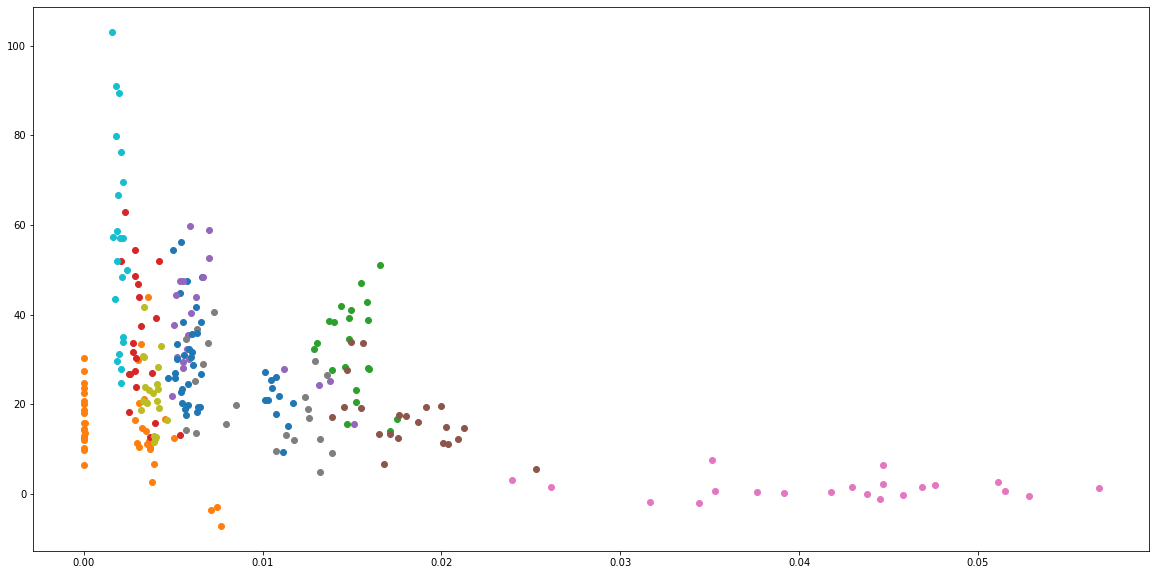

In [45]:
import matplotlib.pyplot as plt
import numpy as np 

plt.figure(figsize=(20,10))
for i in carriers.unique_carrier.unique().tolist():
    plt.scatter(carriers[carriers['unique_carrier']==i]['fuel/pass*km'],carriers[carriers['unique_carrier']==i]['avg_dep_delay'])

In [46]:
carriers.to_csv('carriers_FINAL.csv',index=False)